In [1]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()
Pkg.status()

  Activating project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation`
   Installed Libmount_jll ─────── v2.39.3+0
   Installed Cairo_jll ────────── v1.18.0+1
   Installed WriteVTK ─────────── v1.18.3
   Installed prrte_jll ────────── v3.0.2+0
   Installed HTTP ─────────────── v1.10.4
   Installed LoweredCodeUtils ─── v2.4.5
   Installed XZ_jll ───────────── v5.6.1+0
   Installed TranscodingStreams ─ v0.10.5
   Installed NearestNeighbors ─── v0.4.16
   Installed MPIPreferences ───── v0.1.10
   Installed PMIx_jll ─────────── v4.2.7+0
   Installed libevent_jll ─────── v2.1.12+0
   Installed JLD2 ─────────────── v0.4.46
   Installed ArrayLayouts ─────── v1.7.0
   Installed MPICH_jll ────────── v4.2.0+0
   Installed Libuuid_jll ──────── v2.39.3+1
   Installed JuliaInterpreter ─── v0.9.30
   Installed Gridap ───────────── v0.17.23
   Installed BlockArrays ──────── v0.16.40
   Installed Glib_jll ─────────── v2.80

Status `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Project.toml`
  [8bb1440f] DelimitedFiles v1.9.1
→ [0bd82848] FEMTISE v1.0.0-DEV `/home/martin/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] Gridap v0.17.23
  [033835bb] JLD2 v0.4.46
  [f0f68f2c] PlotlyJS v0.18.13
  [91a5bcdd] Plots v1.39.0
  [295af30f] Revise v3.5.14
Info Packages marked with → are not downloaded, use `instantiate` to download


In [2]:
develop_package = true
computer = "ccad"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

develop_package ? Pkg.develop(path="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl") : nothing

   Resolving package versions...
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Project.toml`
  [0bd82848] ~ FEMTISE v1.0.0-DEV `/home/martin/github_repositories/my_repositories/FEMTISE.jl` ⇒ v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] ↓ Gridap v0.17.23 ⇒ v0.17.20
  [033835bb] ↓ JLD2 v0.4.46 ⇒ v0.4.35
  [f0f68f2c] ↓ PlotlyJS v0.18.13 ⇒ v0.18.10
  [295af30f] ↓ Revise v3.5.14 ⇒ v3.5.6
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Manifest.toml`
  [1520ce14] ↓ AbstractTrees v0.4.5 ⇒ v0.4.4
  [79e6a3ab] ↓ Adapt v4.0.4 ⇒ v3.6.2
  [4fba245c] ↓ ArrayInterface v7.7.1 ⇒ v7.4.11
  [4c555306] ↓ ArrayLayouts v1.7.0 ⇒ v1.4.2
  [15f4f7f2] ↓ AutoHashEquals v2.1.0 ⇒ v2.0.0
  [fbb218c0] ↓ BSON v0.3.9 ⇒ v0.3.7
  [d1d4a3ce] ↓ BitFlags v0.1.8 ⇒ v0.1.7
  [ad839575] ↓ Blink v0.12.9 ⇒ v0.12.8
  [

In [24]:
install_pkg = true
if install_pkg
    # Pkg.add("Revise")
    # Pkg.add("Gridap")
    # Pkg.add("Plots")
    # Pkg.add("JLD2")
    # Pkg.add("DelimitedFiles")
    # Pkg.add("PlotlyJS")
    Pkg.add("SpecialFunctions")
end
using Revise;
using FEMTISE;
using Gridap;
using Gridap.CellData;
using Plots;
using JLD2;
using DelimitedFiles;
using SpecialFunctions;

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Project.toml`
  [276daf66] + SpecialFunctions v2.4.0
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/Manifest.toml`
  [276daf66] ↑ SpecialFunctions v2.3.1 ⇒ v2.4.0
Precompiling project...
  ✓ SpecialFunctions
  ✓ DiffRules
  ✓ ColorVectorSpace → SpecialFunctionsExt
  ✓ FastGaussQuadrature
  ✓ ForwardDiff
  ✓ PolynomialBases
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ ColorSchemes
  ✓ NLSolversBase
  ✓ LineSearches
  ✓ PlotlyBase
  ✓ NLsolve
  ✓ PlotlyJS
  ✓ PlotUtils
  ✓ PlotThemes
  ✓ RecipesPipeline
  ✓ Gridap
  ✓ GridapDistributed
  ✓ GridapGmsh
  ✓ FEMTISE
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  23 dependencies successfully precompiled in 141 

In [4]:
include("./post_proccesing_result_data.jl")
include("./adhoc_potential_function.jl")

effective_electronic_potential_2D (generic function with 1 method)

In [31]:
path_repository="/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE_TUTORIAL/"
path_input_file="$(path_repository)030_experimentation/030_test/coulomb_potential_2D_parameter_variation/020_input/"
input_file_name="$(path_input_file)input"
input_file_name_02="$(path_input_file)02_input"

"/home/martinmendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/020_input/02_input"

Caruso, Francisco, Vitor Oguri, and Felipe Silveira. "Numerical solutions for a two-dimensional quantum dot model." Brazilian Journal of Physics 49 (2019): 432-437.

In [17]:
simulation_info, output_data = collect_result_data(true,input_file_name)

(InputData2D{Tuple{String, String}, Params2D, FEMTISE.AnalysisParam{Float64}, Tuple{Bool, Nothing}}("/home/martinmendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/040_output/", "/home/martinmendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/050_analysis/adhoc_potential_function", Params2D("2D", 10.0, 10.0, "s", 200, 200, 50, -10.0, "effective_electronic_potential_2D", (1.0, 0.1)), FEMTISE.AnalysisParam{Float64}(1, -1.0, 1.0, 0.05), (false, nothing), false, ("jld2", "eigen")), AnalysisParam(ComplexF64[-5.536171379141017 + 2.4409318986776725e-16im -5.063592331569104 - 3.54071415511335e-16im … 2.59340192620704 + 2.238788762915163e-16im 2.6363376090010675 - 1.7100336467384512e-16im; -4.536157886767375 + 5.735247248513215e-17im -4.063580399075973 + 3.803186365404501e-17im … 2.696408539045784 + 2.447539887174045e-16im 2.730106271217984

In [44]:
simulation_info_02, output_data_02 = collect_result_data(true,input_file_name_02)

(InputData2D{Tuple{String, String}, Params2D, Bool, Tuple{Bool, Nothing}}("/home/martinmendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/040_output/effective_Yukawa_potential_2e", "/home/martinmendez/github_repositories/my_repositories/FEMTISE_TUTORIAL/030_experimentation/030_test/coulomb_potential_2D_parameter_variation/050_analysis/adhoc_potential_function", Params2D("2D", 10.0, 10.0, "s", 100, 100, 50, -10.0, "effective_Yukawa_potential_2e", (1.0, 100.0, 1.0, 4.0, 2.0)), false, (false, nothing), false, ("jld2", "eigen")), DefaultJLD2EigenProblem{Tuple{Vector{Float64}, Vector{Float64}}, Vector{VectorValue{2, Float64}}}(ComplexF64[-6.8699209952323965 + 1.1930660686230644e-16im, -5.055350003380742 - 1.4190208262742349e-16im, -5.0553500033806875 - 4.241323193534292e-17im, -4.443130168048386 + 4.999473557964073e-17im, -4.443130168048384 + 3.8500694254496765e-17im, -3.999377663456385 - 1.4223302794121303e-16im

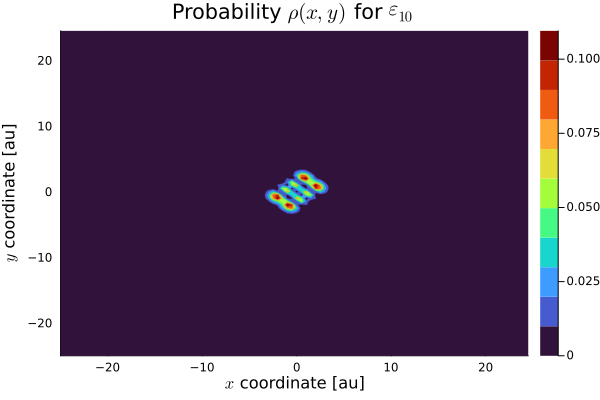

In [11]:
fig1=plot_eigenstates(simulation_info,output_data,10;mapcolor=:turbo)
display(fig1)

In [12]:
save("eigenstate_energy10.pdf",fig1)

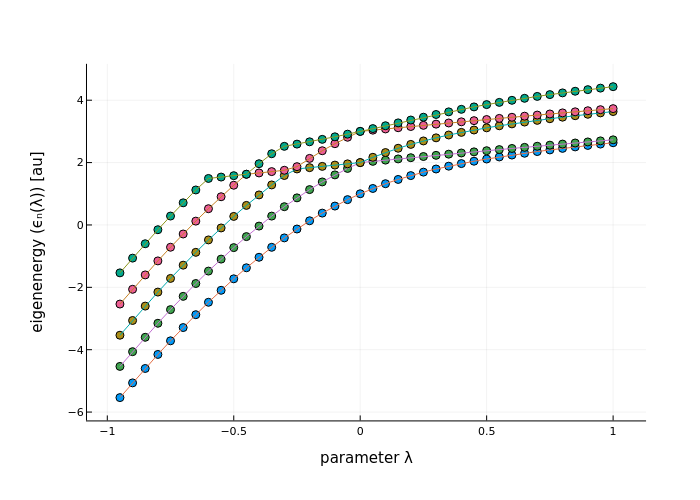

In [23]:
fig1=plot_eigenvalues(simulation_info,output_data,1:1:5;show_label=false)
display(fig1)

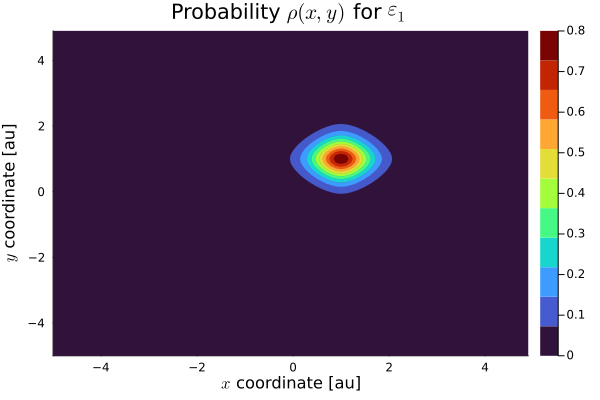

In [46]:
fig2=plot_eigenstates(simulation_info_02,output_data_02,1;mapcolor=:turbo)
display(fig2)

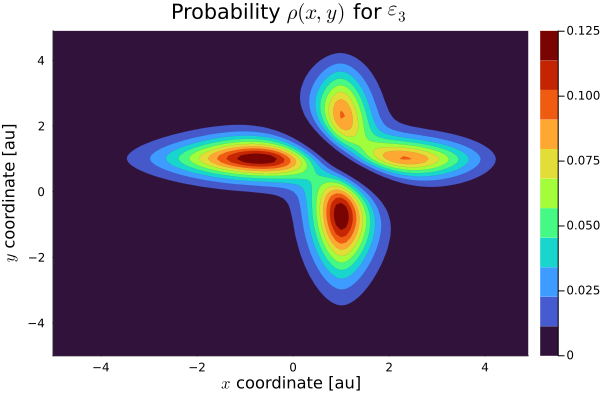

In [43]:
fig2=plot_eigenstates(simulation_info_02,output_data_02,3;mapcolor=:turbo)
display(fig2)

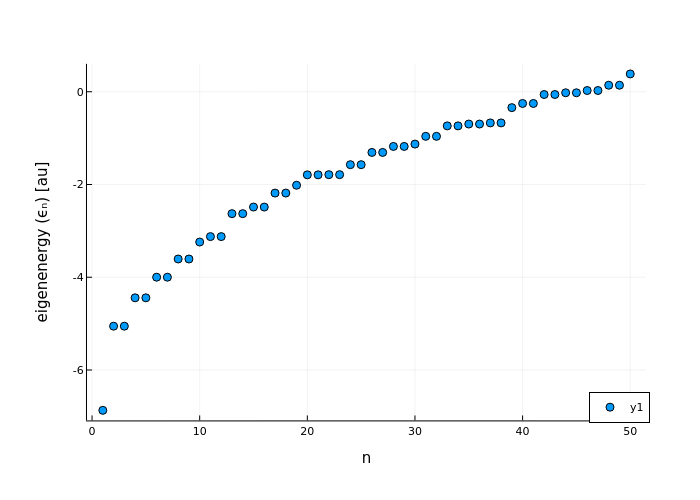

In [47]:
fig2=plot_eigenvalues(simulation_info_02,output_data_02)
display(fig2)